In [20]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 



In [21]:
# Load the data into a pd dataframe without to explore the data
df = wine_quality.data.original
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [22]:
# Check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [23]:
df.describe().round(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


<Axes: >

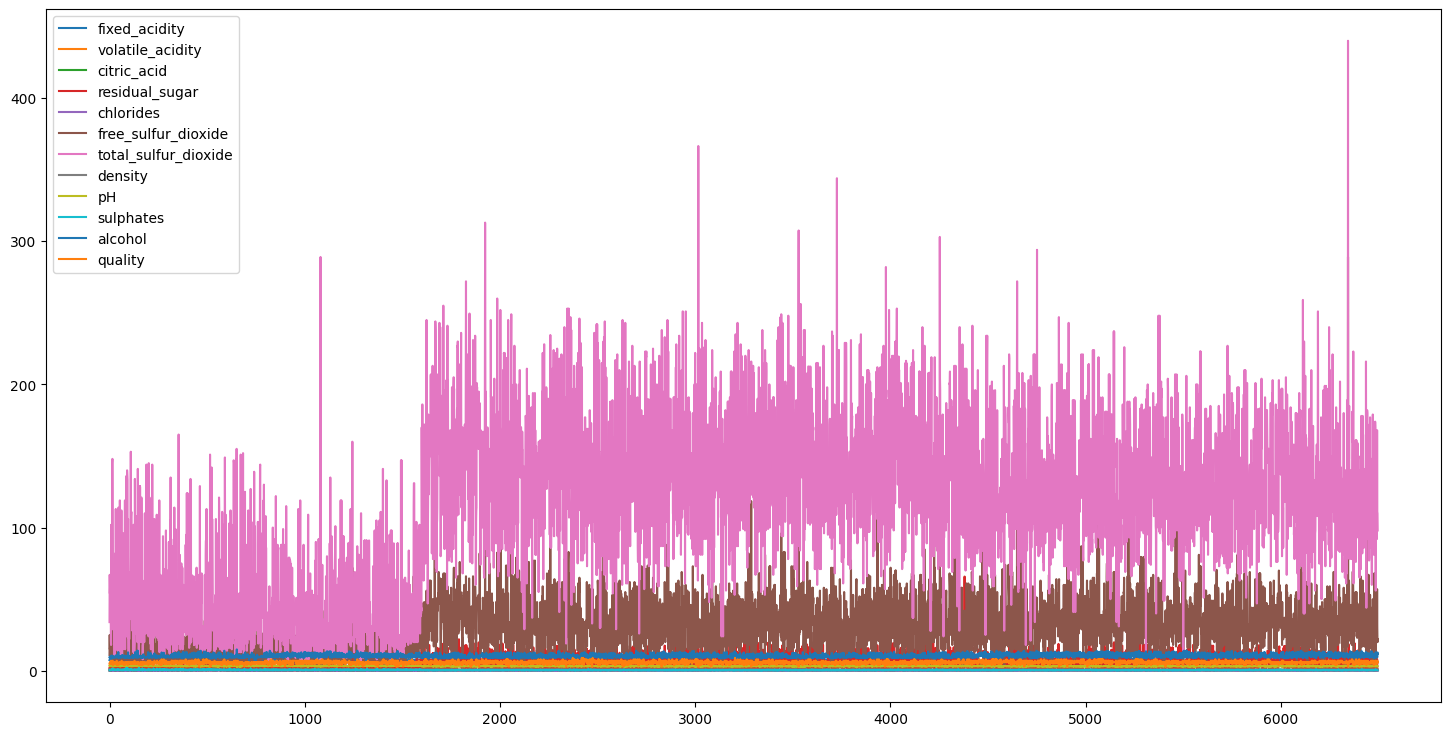

In [24]:
df.plot(figsize=(18, 9))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
# Check the data types of all columns
print(df.dtypes)

# Check for non-numeric values in the 'quality' column
non_numeric_quality = df[~df['quality'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_quality)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object
Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []


<Axes: xlabel='quality'>

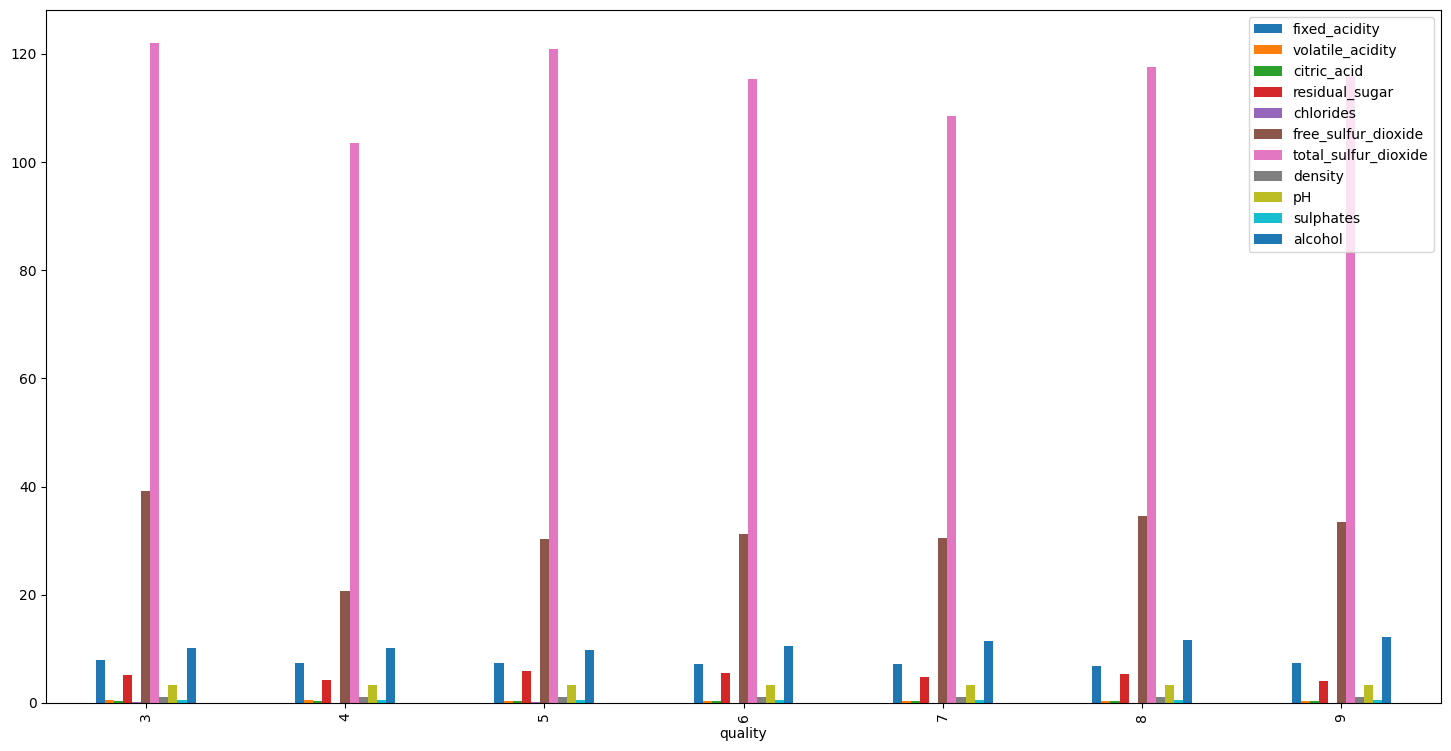

In [27]:
# Groupby the 'quality' column and calculate the mean of all other columns excluding non-numeric columns (color)
mean_quality = df.groupby('quality').mean(numeric_only=True)
mean_quality.plot(kind='bar', figsize=(18, 9))

In [28]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# Identify the significant features
model_stats = sm.OLS(y, X).fit()
model_stats.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.710e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):                        0.00
Time:                        08:32:18   Log-Likelihood:                         -7226.4
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6486   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0100      0.010      1.047      0.295      -0.009       0.029
volatile_acidity        -1.4573      0.072    -20.130      0.000      -1.599      -1.315
citric_acid             -0.1137      0.080     -1.426      0.154      -0.270       0.043
residual_sugar           0.0221      0.002      9.259      0.000       0.017       0.027
chlorides               -0.7955      0.326     -2.436      0.015      -1.436      -0.155
free_sulfur_dioxide      0.0060      0.001      7.966      0.000       0.005       0.007
total_sulfur_dioxide    -0.0022      0.000     -8.228      0.000      -0.003      -0.002
density                  1.9225      0.281      6.837      0.000       1.371       2.474
pH                       0.1641      0.069      2.384      0.017       0.029       0.299
sulphates                0.6408      0.071      8.998      0.000       0.501       0.780
alcohol                  0.3333      0.009     37.212      0.000       0.316       0.351
==============================================================================
Omnibus:                      140.142   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.565
Skew:                           0.010   Prob(JB):                     2.21e-68
Kurtosis:                       4.073   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:

# Extract p-values from the summary
p_values = model_stats.pvalues

# Filter variables with p-values less than 0.05
significant_vars = p_values[p_values < 0.05].index

# Print the names of the significant variables
print(significant_vars)

X_reduce = X[significant_vars]

Index(['volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


In [43]:

  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables["name"]) 
# list = ""
# for name in wine_quality.variables["name"]:
#     list += name + ", "
#     print(list)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

### Logistic Regression

In [31]:
# Import and use Logisitc regression to predict quality from X
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduce, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=5000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict the quality of the test data
y_pred = log_reg.predict(X_test)


/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.53      0.62      0.57       402
           6       0.53      0.69      0.60       597
           7       0.48      0.14      0.22       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.36      0.23      0.24      1300
weighted avg       0.49      0.53      0.49      1300



/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### Linear Regression

0.5454558740290124


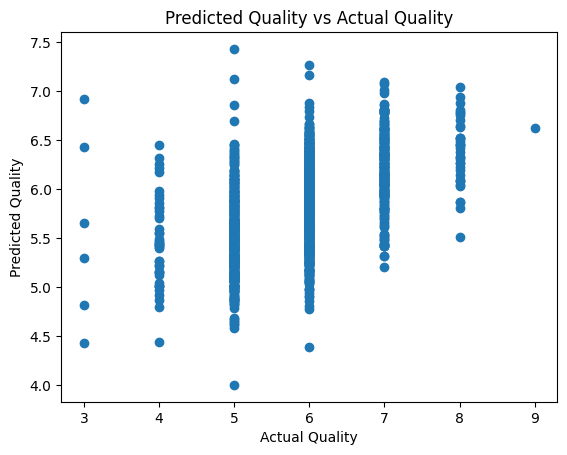

In [33]:
# Import and use Linear regression to predict quality from X
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict the quality of the test data
y_pred = lin_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

# Plot the predicted quality against the actual quality
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality vs Actual Quality')
plt.show()

### Linear Discriminant Analysis

In [34]:
# Import and use LDA to predict quality from X
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X_reduce, y, test_size=0.2, random_state=42)

# Create a Linear Discriminant Analysis model
LDA = LinearDiscriminantAnalysis()

# Fit the model to the training data
LDA.fit(X_train, y_train)

# Predict the quality of the test data
y_pred = LDA.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.55      0.66      0.60       597
           7       0.49      0.27      0.35       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.25      0.24      0.24      1300
weighted avg       0.50      0.54      0.51      1300



/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/miniconda3/envs/ISLP/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/miniconda3/envs/ISLP/